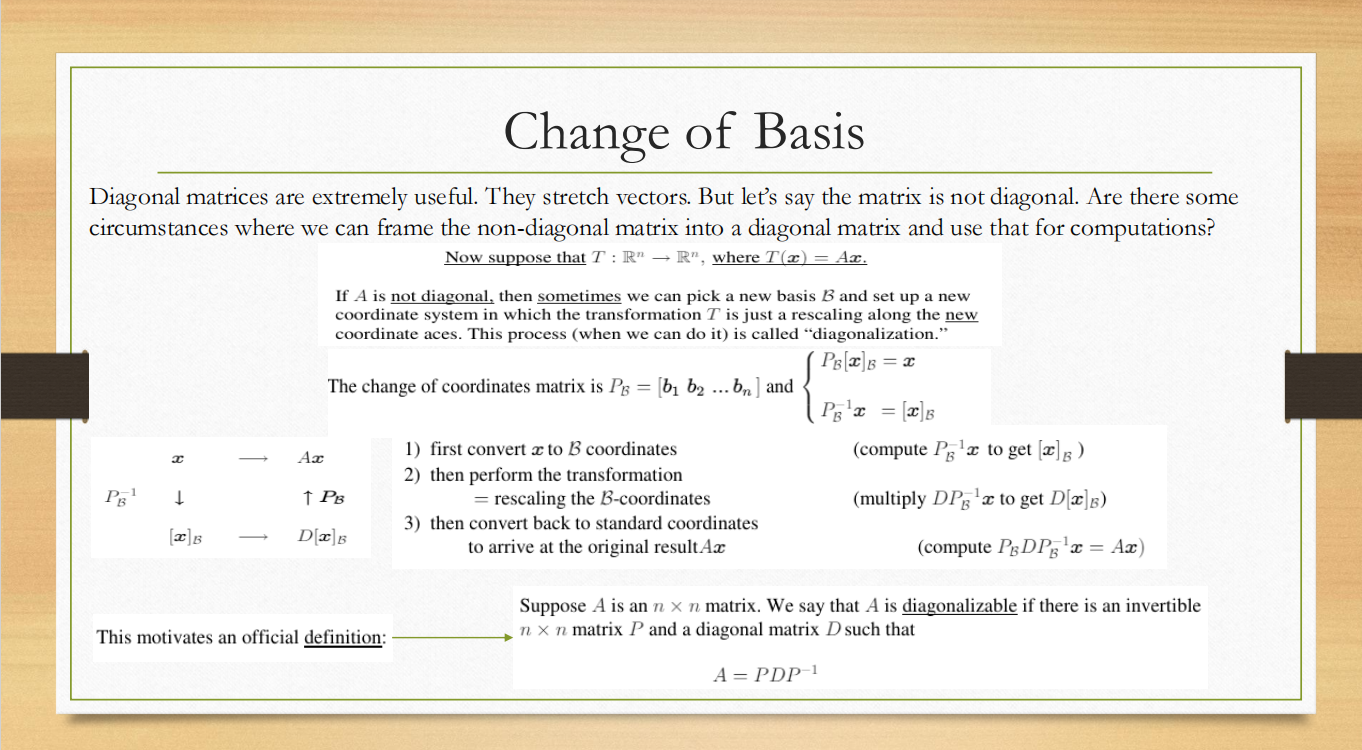

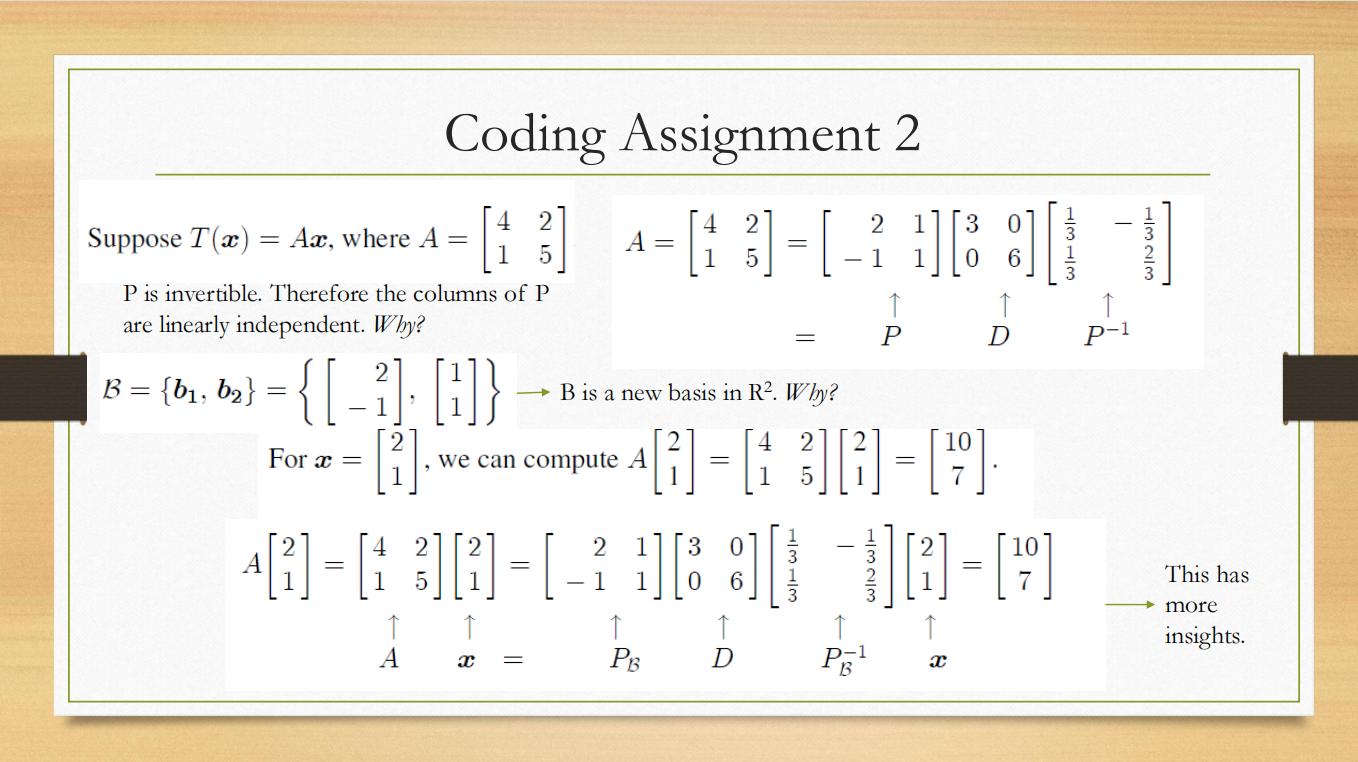

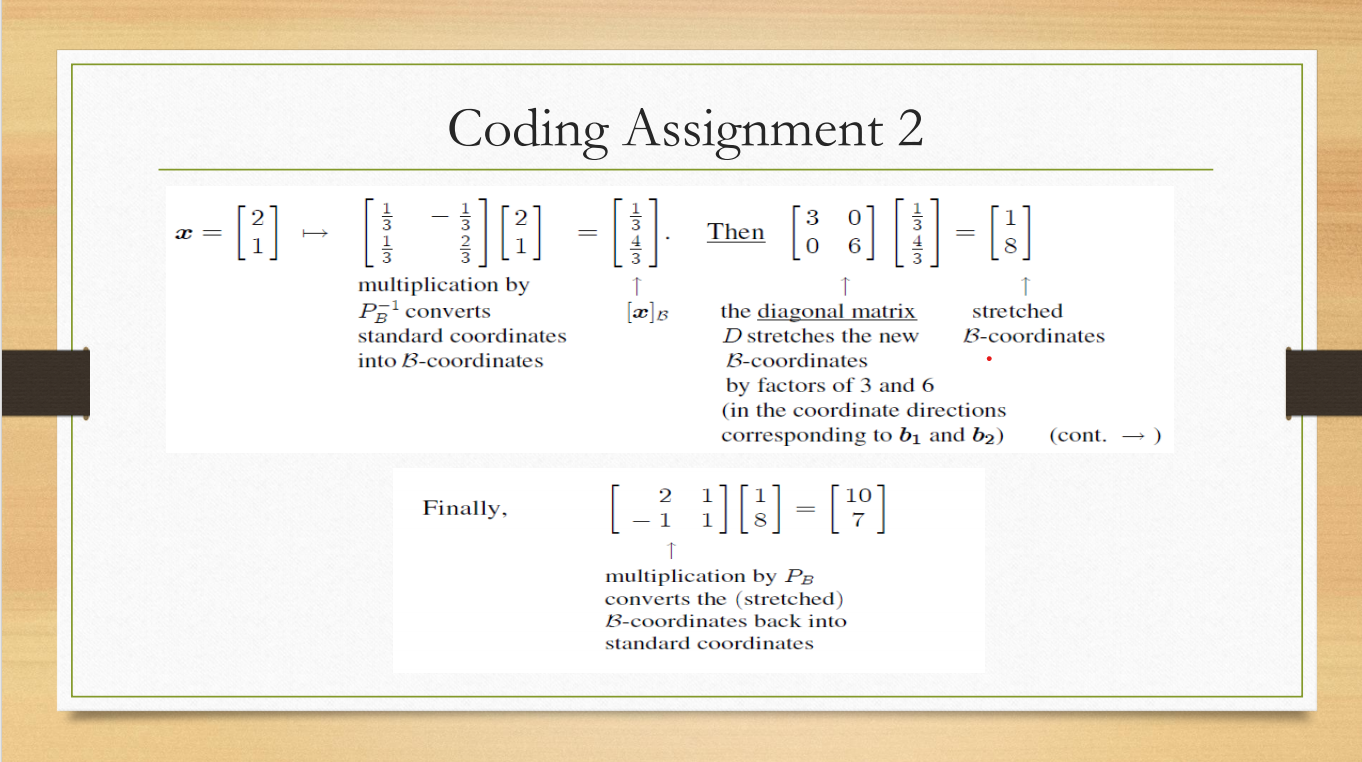

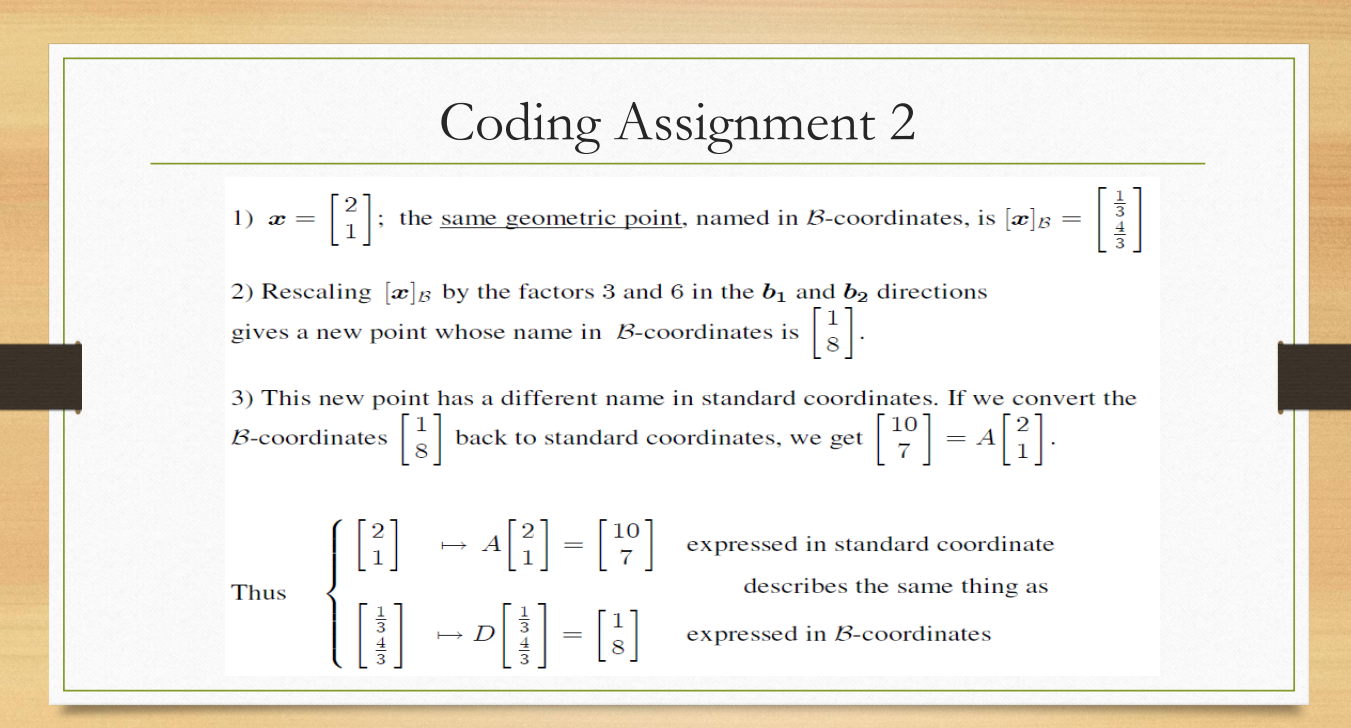

In [1]:
import numpy as np
import sympy as sp # Import the necessary Modules


In [2]:
def Diagonalize(matrix):
    
    #Find P and D using digonalize method available in sympy
    P,D = matrix.diagonalize()
    
    #Adjust the sign of the matrix (Doesn't affect the diagonalization process.)
    P[:,0]*=-1 
    
    #Find the inverse of P 
    P_inv = P.inv()
    
    #return the digonalized matrix
    return P,D,P_inv 

In [3]:
#Define the matrix and vector.
A = sp.Matrix([[4,2],
             [1,5]]) # Define Matrix A
X = np.array([2,1]) # Define Matrix X

#Find the P,D,P Inverse 
P,D,P_inv = Diagonalize(A)

#Display P,D,P inverse
print("P:",P)
print("D:",D)
print("P Inverse:",P_inv)

P: Matrix([[2, 1], [-1, 1]])
D: Matrix([[3, 0], [0, 6]])
P Inverse: Matrix([[1/3, -1/3], [1/3, 2/3]])


xb: [1/3 4/3]
DXb: [1 8]
PDXb: [10 7]
b1: [[2]
 [-1]]
b2: [[1]
 [1]]
x_intercept: [[2]
 [1]]
[[2]
 [-1]]
[[8]
 [8]]
[[10]
 [7]]


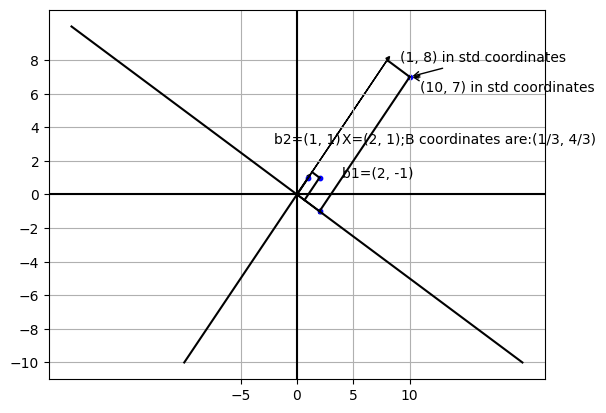

In [70]:
import matplotlib.pyplot as plt #Import the necessary modules.

fig,ax = plt.subplots()

#Define the standard Basis.
standard_coordinates = np.array([[0,1],[1,0]])

#find Xb (change the basis)
Xb = P_inv@X
print("xb:",Xb)

#find DXb mulitply the xb and diagonal matrix for linear transformation.
DXb = D@Xb
print("DXb:",DXb)

#Change the basis to the standard bais.
PDXb = P@DXb
print("PDXb:",PDXb)

#Extract the basis.
b1 = np.array(P[:,0])
b2 = np.array(P[:,1])
print("b1:",b1)
print("b2:",b2)

#Draw the Standard basis coordinate.
ax.axhline(color="k")
ax.axvline(color="k")

#set origin
origin = [0,0]
offset = 2

#Draw the basis coordinates (where digonalization happens).
ax.arrow(*origin,int(b1[0][0]),int(b1[1][0]),head_width=0.3,head_length=0.3,facecolor="k",edgecolor="k")
ax.arrow(*origin,int(b2[0][0]),int(b2[1][0]),head_width=0.3,head_length=0.3,facecolor="k",edgecolor="k")
ax.scatter(int(P[0,0]),int(P[1,0]),color="b",s=10) 
ax.scatter(int(P[0,1]),int(P[1,1]),color="b",s=10)

#Draw x in the standard coordinate.(where x and xb are plotted in same place)
ax.scatter(X[0],X[1],color="b",s=10) 

#Draw the Linear Transformation of x in basis coordinate.
#Find the position of x,y of xb in standard coordinate
x_along_b1 = Xb[0]*b1 #Represent x value of Xb in standard coordinate.(change the basis)
x_along_b2 = Xb[1]*b2 #Represent y value of Xb in standard coordinate.(change the basis)
x_intercept = x_along_b1 + x_along_b2 #Represent Xb in standard coordinate.
print("x_intercept:",x_intercept)

ax.plot([x_along_b1[0],x_intercept[0]],[x_along_b1[1],x_intercept[1]],color="k")
ax.plot([x_along_b2[0],x_intercept[0]],[x_along_b2[1],x_intercept[1]],color="k")

#Draw the stretched x in the basis coordinate.
Stretched_x_along_b1 = DXb[0]*b1 #Represent x value of Stretched x in standard coordinate.
print(Stretched_x_along_b1) 
Stretched_x_along_b2 = DXb[1]*b2 #Represent y value of stretched x in standard coordinate.
print(Stretched_x_along_b2)

ax.arrow(*origin,int(Stretched_x_along_b2[0][0]),int(Stretched_x_along_b2[1][0]),head_width=0.3,head_length=0.3,facecolor="k",edgecolor="k")

intercept_point= Stretched_x_along_b2 + Stretched_x_along_b1
print(intercept_point) #Represent the x,y value of stretched x in standard coordinate.

ax.plot([Stretched_x_along_b2[0][0],intercept_point[0][0]],[Stretched_x_along_b2[1][0],intercept_point[1][0]],color="k")
ax.plot([Stretched_x_along_b1[0][0],intercept_point[0][0]],[Stretched_x_along_b1[1][0],intercept_point[1][0]],color="k")

#Draw the Linear Transformation of x in standard basis coordinate.
ax.scatter(PDXb[0],PDXb[1],color="b",s=10)

#Extend b2 in negative direction.
plt.plot([b2[0][0],-10],[b2[1][0],-10],color="k")
#Extend b1 in negative direction.
plt.plot([b1[0][0],20],[b1[1][0],-10],color="k")
#Extend b1 in positive direction.
plt.plot([b1[0][0],-20],[b1[1][0],10],color="k")


#Annonate basis where diagonalization happens.
ax.annotate(f'b1={int(P[0,0]),int(P[1,0])}',xy=(int(P[0,0]),int(P[1,0])),xytext=(int(P[0,0])+offset,int(P[1,0])+offset))
ax.annotate(f'b2={int(P[0,1]),int(P[1,1])}',xy=(int(P[0,1]),int(P[1,1])),xytext=(int(P[0,1])-3,int(P[1,1])+offset))
#Annonate x in the standard coordinate.
ax.annotate(f'X={X[0],X[1]};B coordinates are:{Xb[0],Xb[1]}',xy=([X[0],X[1]]),xytext=(X[0]+offset,X[1]+offset))
#Annonate Linear Transfomration of x in basis coordinate.
ax.annotate(f'{int(DXb[0]),int(DXb[1])} in std coordinates',
                xy=(int(PDXb[0]),int(PDXb[1])),
                xytext=(int(PDXb[0])-.9,int(PDXb[1])+.9),
                arrowprops=dict(arrowstyle='->'))
#Annonate Linear Transfomration of x in the standard basis
ax.annotate(f'{int(PDXb[0]),int(PDXb[1])} in std coordinates',
                xy=(int(PDXb[0]),int(PDXb[1])),
                xytext=(int(PDXb[0])+.9,int(PDXb[1])-.9),
                arrowprops=dict(arrowstyle='->'))


plt.xticks(range(-5, 15, 5))
plt.yticks(range(-10, 10, 2))
plt.grid()
